<a href="https://colab.research.google.com/github/kimvkemenade/DM_team16/blob/main/DM_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 2 (Group 16)**


# Cleaning data

In [ ]:
#importing the needed packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# downloading the dataset
!kaggle datasets download rodsaldanha/arketing-campaign

# unzipping the dataset
!unzip arketing-campaign.zip

df_raw = pd.read_csv('marketing_campaign.csv', sep = ';')
marketing_df = df_raw.copy()

Dataset URL: https://www.kaggle.com/datasets/rodsaldanha/arketing-campaign
License(s): other
  0% 0.00/352k [00:00<?, ?B/s]
100% 352k/352k [00:00<00:00, 29.7MB/s]
Archive:  arketing-campaign.zip
  inflating: marketing_campaign.csv  
  inflating: marketing_campaign.xlsx  


In [ ]:
marketing_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
print("Shape of the dataframe:", marketing_df.shape)
marketing_df.info()

Shape of the dataframe: (2240, 29)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  Num

| #  | Variable               | Description                                                                 |
|----|------------------------|-----------------------------------------------------------------------------|
| 1  | AcceptedCmp1           | 1 if customer accepted the offer in the 1st campaign, 0 otherwise           
| 2  | AcceptedCmp2           | 1 if customer accepted the offer in the 2nd campaign, 0 otherwise           |
| 3  | AcceptedCmp3           | 1 if customer accepted the offer in the 3rd campaign, 0 otherwise           |
| 4  | AcceptedCmp4           | 1 if customer accepted the offer in the 4th campaign, 0 otherwise           |
| 5  | AcceptedCmp5           | 1 if customer accepted the offer in the 5th campaign, 0 otherwise           |
| 6  | Response      | 1 if customer accepted the offer in the last campaign, 0 otherwise          |
| 7  | Complain               | 1 if customer complained in the last 2 years                                |
| 8  | DtCustomer             | date of customer’s enrolment with the company                               |
| 9  | Education              | customer’s level of education                                               |
| 10 | Marital                | customer’s marital status                                                   |
| 11 | Kidhome                | number of small children in customer’s household                            |
| 12 | Teenhome               | number of teenagers in customer’s household                                 |
| 13 | Income                 | customer’s yearly household income                                          |
| 14 | MntFishProducts        | amount spent on fish products in the last 2 years                           |
| 15 | MntMeatProducts        | amount spent on meat products in the last 2 years                           |
| 16 | MntFruits              | amount spent on fruits products in the last 2 years                         |
| 17 | MntSweetProducts       | amount spent on sweet products in the last 2 years                          |
| 18 | MntWines               | amount spent on wine products in the last 2 years                           |
| 19 | MntGoldProds           | amount spent on gold products in the last 2 years                           |
| 20 | NumDealsPurchases      | number of purchases made with discount                                      |
| 21 | NumCatalogPurchases    | number of purchases made using catalogue                                    |
| 22 | NumStorePurchases      | number of purchases made directly in stores                                 |
| 23 | NumWebPurchases        | number of purchases made through company’s web site                         |
| 24 | NumWebVisitsMonth      | number of visits to company’s web site in the last month                    |
| 25 | Recency                | number of days since the last purchase                                      |

## Checking the balanceness of marketing campaign variables

In [ ]:
not_accepted_df = marketing_df[(marketing_df['AcceptedCmp1'] == 0) &
                 (marketing_df['AcceptedCmp2'] == 0) &
                 (marketing_df['AcceptedCmp3'] == 0) &
                 (marketing_df['AcceptedCmp4'] == 0) &
                 (marketing_df['AcceptedCmp5'] == 0) &
                 (marketing_df['Response'] == 0)]

# Display the filtered DataFrame
not_accepted_df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,2013-09-09,16,520,...,6,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2232,8080,1986,Graduation,Single,26816.0,0,0,2012-08-17,50,5,...,4,0,0,0,0,0,0,3,11,0
2233,9432,1977,Graduation,Together,666666.0,1,0,2013-06-02,23,9,...,6,0,0,0,0,0,0,3,11,0
2234,8372,1974,Graduation,Married,34421.0,1,0,2013-07-01,81,3,...,7,0,0,0,0,0,0,3,11,0
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
columns_to_check = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
accepted_df = marketing_df[(marketing_df[columns_to_check] != 0).any(axis=1)]

# Display the filtered DataFrame
accepted_df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
8,4855,1974,PhD,Together,30351.0,1,0,2013-06-06,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,2014-03-13,68,28,...,20,1,0,0,0,0,0,3,11,0
15,2114,1946,PhD,Single,82800.0,0,0,2012-11-24,23,1006,...,3,0,0,1,1,0,0,3,11,1
18,6565,1949,Master,Married,76995.0,0,1,2013-03-28,91,1012,...,5,0,0,0,1,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2228,8720,1978,2n Cycle,Together,NaN,0,0,2012-08-12,53,32,...,0,0,1,0,0,0,0,3,11,0
2230,7004,1984,Graduation,Single,11012.0,1,0,2013-03-16,82,24,...,9,1,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0


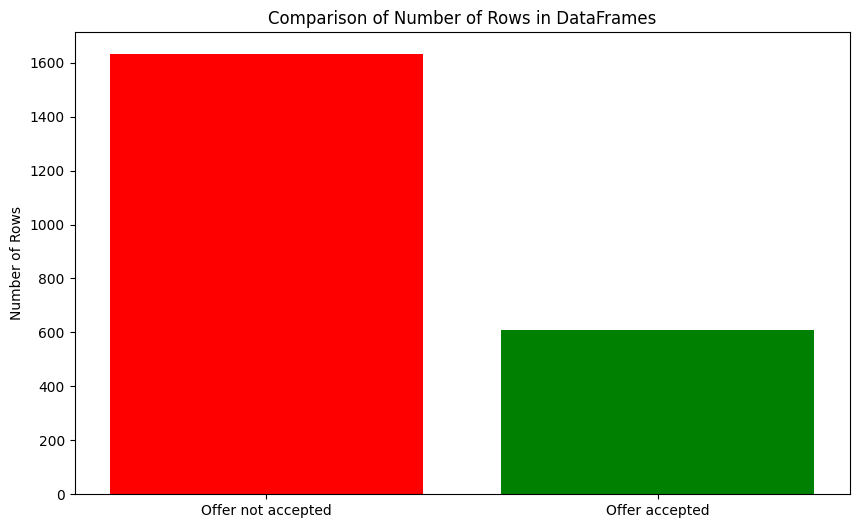

In [ ]:
num_rows_filtered_df = len(not_accepted_df)
num_rows_filtered_non_zero_df = len(accepted_df)

# Data for plotting
data = {
    'DataFrame': ['Offer not accepted', 'Offer accepted'],
    'Number of Rows': [num_rows_filtered_df, num_rows_filtered_non_zero_df]
}

# Create a DataFrame for plotting
plot_df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(plot_df['DataFrame'], plot_df['Number of Rows'], color=['red', 'green'])
plt.ylabel('Number of Rows')
plt.title('Comparison of Number of Rows in DataFrames')
plt.show()

As can be seen in the graph above, not many consumers have accepted any offers. Additionally, since our purpose is to predict whether marketing campaings work in general and also because there is no description what each individual marketing campaign is, we are creating a new variable `AcceptedCmp` that is 1 if a customer accepted any of the six campaigns (including `Response`) and 0 if a customer did not accept any.

In [ ]:
#some cleaning
#getting rid of Z_CostContact and Z_Revenue constant variables
marketing_df = marketing_df.drop(['Z_CostContact', 'Z_Revenue'], axis=1)

#creating AcceptedCmp variable
marketing_df['AcceptedCmp'] = marketing_df[['AcceptedCmp1', 'AcceptedCmp2',
                                            'AcceptedCmp3',
                                            'AcceptedCmp4', 'AcceptedCmp5',
                                            'Response']].max(axis=1)

#dropping unuseful variables
marketing_df = marketing_df.drop(['AcceptedCmp1', 'AcceptedCmp2',
                                  'AcceptedCmp3', 'AcceptedCmp4',
                                  'AcceptedCmp5', 'Response'], axis=1)

marketing_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,AcceptedCmp
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,172,88,88,3,8,10,4,7,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,2,1,6,2,1,1,2,5,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,111,21,42,1,8,2,10,4,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,10,3,5,2,2,0,4,6,0,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,46,27,15,5,5,3,6,5,0,0


## Missing values

In [ ]:
# Number of missing values
print(marketing_df.isnull().sum())

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Complain                0
AcceptedCmp             0
dtype: int64


Since only 24 rows have missing values, we are dropping them, believing it will not affect the data:

In [ ]:
# Dropping NAs
marketing_df = marketing_df.dropna()

In [ ]:
# Checking whether there are duplicated values
marketing_df.duplicated().sum()

0

## Outliers

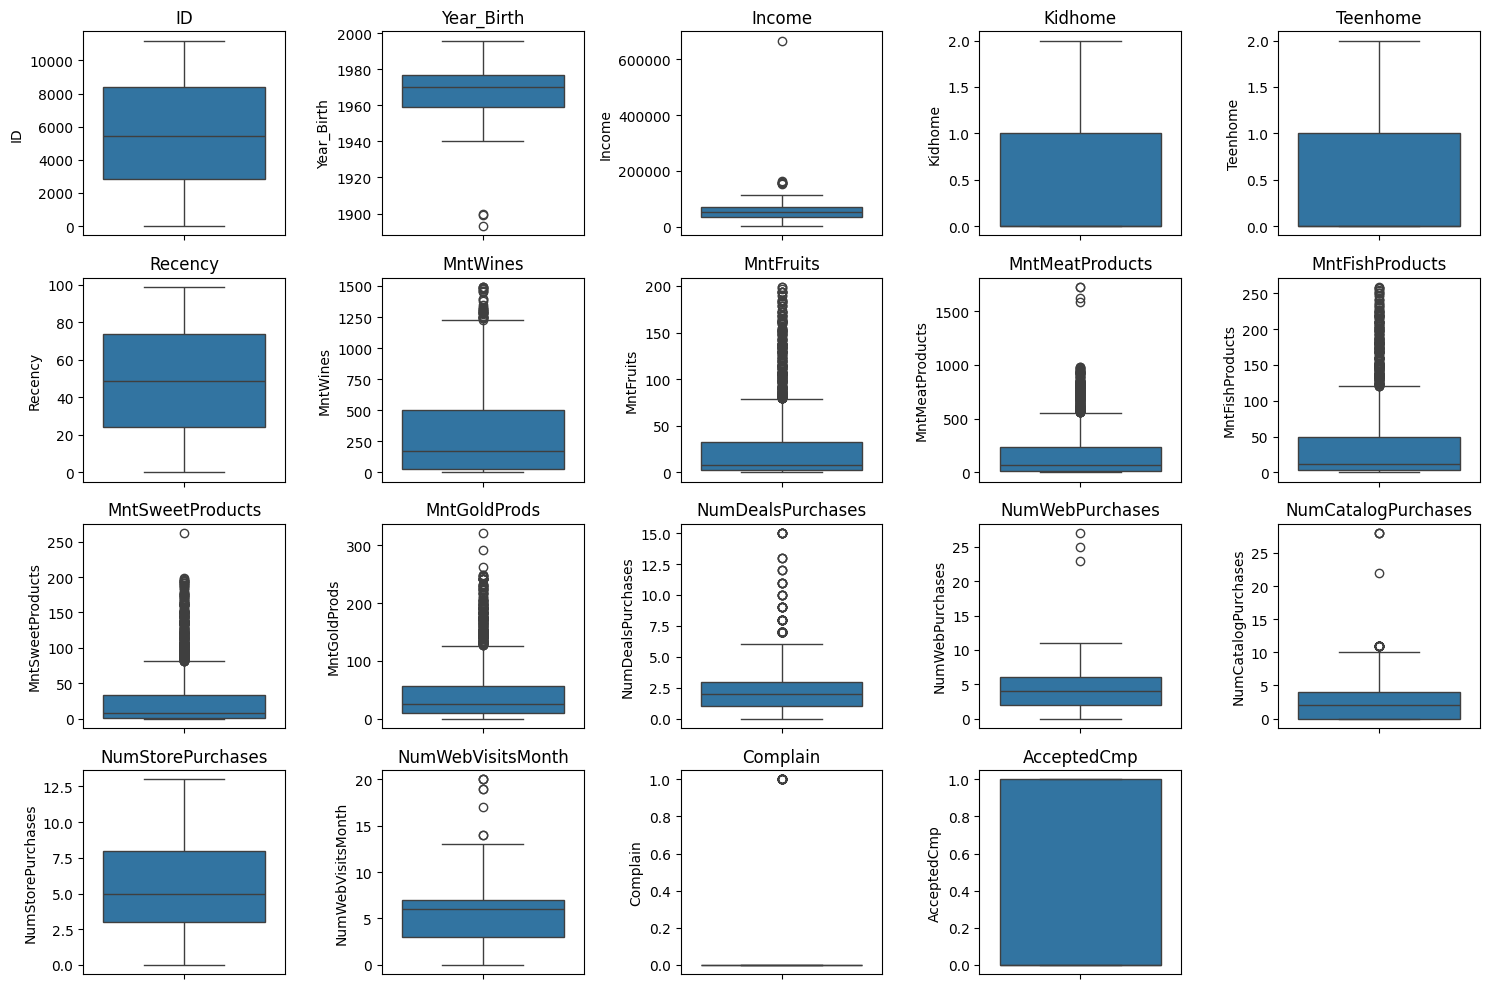

In [ ]:
# selecting only numeric variables to check for the ouliers
numerical_columns = marketing_df.select_dtypes(include = ['float64', 'int64']).columns

# create a figure with barplot subplots
plt.figure(figsize = (15, 10))
for i, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns)//5 + 1, 5, i)
    sns.boxplot(y = marketing_df[feature], showfliers = True)
    plt.title(feature)
plt.tight_layout()
plt.show()

It seems like variables `Income`, `NumWebPurchases`, `NumCatalogPurchases` have some outliers.

To further investigate:

There is a significant bias in the data, if we want to predict this we need to deal with this unbalancedness. Additionally, since we are gonna use models that use distance metrics, we need to standardize our features. The codes for these tasks are located in the **Models** section.

# EDA

* **include some graphs**
* **association rule analysis**

In [ ]:
marketing_df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,AcceptedCmp
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,2.323556,4.085289,2.671029,5.800993,5.319043,0.009477,0.273014
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,1.923716,2.740951,2.926734,3.250785,2.425359,0.096907,0.445609
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,1.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000


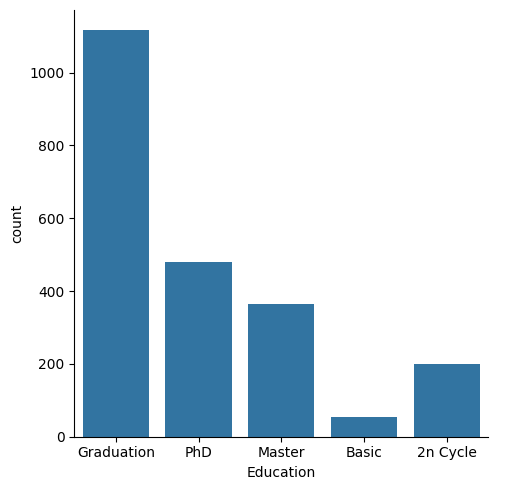

In [ ]:
sns.catplot(data=marketing_df, x="Education", kind="count")

In [ ]:
marketing_df['Education'].value_counts()

,count
Education,
Graduation,1116
PhD,481
Master,365
2n Cycle,200
Basic,54


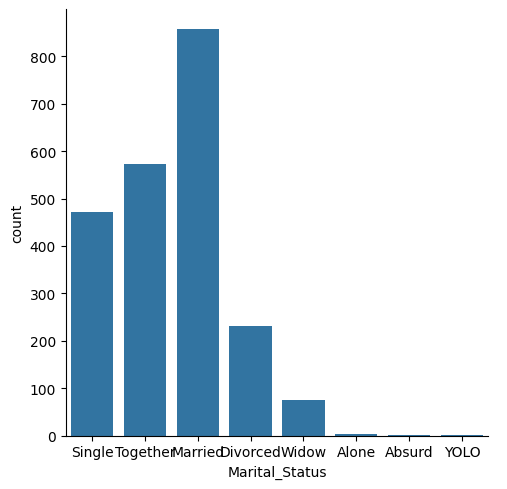

In [ ]:
sns.catplot(data=marketing_df, x="Marital_Status", kind="count",)

In [ ]:
# counting marital statuses
marketing_df['Marital_Status'].value_counts()

,count
Marital_Status,
Married,857
Together,573
Single,471
Divorced,232
Widow,76
Alone,3
Absurd,2
YOLO,2


Above, we can see that there are some interesting `Marital_Status` categories, such as *Alone*, *Absurd*, and *YOLO*. We have decided to add *Alone* customers to the Singles, and get rid of the *Absurd* and *YOLO* ones.

In [ ]:
#replacing 'Alone' with 'Single'
marketing_df['Marital_Status'] = marketing_df['Marital_Status'].replace({'Alone': 'Single'})

#remowing rows where Marital_Status is 'Absurd' or 'YOLO'
marketing_df = marketing_df[~marketing_df['Marital_Status'].isin(['Absurd', 'YOLO'])]

# counting marital statuses
marketing_df['Marital_Status'].value_counts()

,count
Marital_Status,
Married,857
Together,573
Single,474
Divorced,232
Widow,76


## Clustering
### K Means

This is a distance-based algorithm so prior to training it it is crucial to standardized the variables so they have equal weight to the model.

Since StandardScalar() only works with numeric data, we first need to handle our non-numeric features (Education, Marital_Status, Dt_Customer)

Since Marital_status and Education are categorical one hot encoding will be implemented. Additional insights need to be gained about Dt_customer to decide how to treat it.

Counting the number of cells for Dt_customer, to consider the possibility of doing one hot encoding

In [ ]:
# counting number of unique cells for Dt_customer
print(marketing_df["Dt_Customer"].nunique())

# counting number of unique cells for ID
marketing_df["ID"].nunique()

[(column_name, marketing_df[column_name].nunique()) for column_name in list(marketing_df.columns)]

662


[('ID', 2212),
 ('Year_Birth', 59),
 ('Education', 5),
 ('Marital_Status', 5),
 ('Income', 1973),
 ('Kidhome', 3),
 ('Teenhome', 3),
 ('Dt_Customer', 662),
 ('Recency', 100),
 ('MntWines', 776),
 ('MntFruits', 158),
 ('MntMeatProducts', 554),
 ('MntFishProducts', 182),
 ('MntSweetProducts', 176),
 ('MntGoldProds', 211),
 ('NumDealsPurchases', 15),
 ('NumWebPurchases', 15),
 ('NumCatalogPurchases', 14),
 ('NumStorePurchases', 14),
 ('NumWebVisitsMonth', 16),
 ('Complain', 2),
 ('AcceptedCmp', 2)]

ID is also removed because this column is only used to identify customers, it does not contain meaningful patterns that would help in clustering. Specially when considering that all observations of this variable are unique. Columns Z_CostContact and Z_revenue are also removed for the opposite, all the values are the same, thus not adding any additional insights to the data.

Dt_Customer on the other hand, has 662 different cells which would mean adding 663 additional columns to our dataset if we were to treat date as a dummy. This in practice makes no sense since it is not a categorical variable and would increase dimesnsionality by a lot. Thus, this varaible is dropped before performing clustering

In [ ]:
# performing one-hot scaling on categroical variables so you can
df_encoded = pd.get_dummies(marketing_df, columns= ["Education", "Marital_Status"], dtype='int')

# dropping Dt_Customer as this variable is non_numeric and one-hot-encoding would result in 663 additional columns
df_encoded = df_encoded.drop(["Dt_Customer", "ID"], axis = 1)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # stanadardizing data
marketing_normalized = scaler.fit_transform(df_encoded)

#turning output into a dataframe
marketing_df_normalized = pd.DataFrame(marketing_normalized, index=df_encoded.index, columns=df_encoded.columns)



In [ ]:
marketing_df_normalized.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2212 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year_Birth               2212 non-null   float64
 1   Income                   2212 non-null   float64
 2   Kidhome                  2212 non-null   float64
 3   Teenhome                 2212 non-null   float64
 4   Recency                  2212 non-null   float64
 5   MntWines                 2212 non-null   float64
 6   MntFruits                2212 non-null   float64
 7   MntMeatProducts          2212 non-null   float64
 8   MntFishProducts          2212 non-null   float64
 9   MntSweetProducts         2212 non-null   float64
 10  MntGoldProds             2212 non-null   float64
 11  NumDealsPurchases        2212 non-null   float64
 12  NumWebPurchases          2212 non-null   float64
 13  NumCatalogPurchases      2212 non-null   float64
 14  NumStorePurchases        2212

2216

Now that the data has been standadrized we can move on with applying the K means algorithm. To use this model, you need to predetermine the number of clusters (K), so multiples K will be considered at the beginning to compare them and select the optimal number.

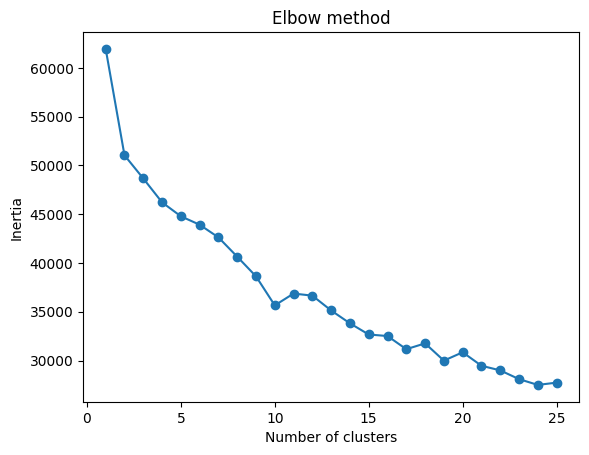

In [ ]:
from sklearn.cluster import KMeans
# performing K-means clustering for each number of clusters (1-12 clusters)
inertias = []

for i in range(1,26):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(marketing_df_normalized)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,26), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

Based on this illustration and the elbow method, we would argue that the optimal K value is around 10 as from this point onwards inertia increases slightly (initially) and then diminishing at a lower rate (this is more evident by looking at the list below, were the first number of each tuple represents the value of k and the second the inertis). Thus, 10 clusters were selected

In [ ]:
[(k, inertia) for k, inertia in zip(range(1,101), inertias)] # 79775

[(1, 61935.99999999992),
 (2, 51036.253754669895),
 (3, 48658.855696058825),
 (4, 46212.60663559536),
 (5, 44782.93220879856),
 (6, 43918.24641013422),
 (7, 42620.53341542331),
 (8, 40643.16751826871),
 (9, 38627.41649926824),
 (10, 35651.275450686095),
 (11, 36864.3008060901),
 (12, 36648.69269584373),
 (13, 35129.04445687221),
 (14, 33811.69692559934),
 (15, 32667.516904942007),
 (16, 32510.13063542433),
 (17, 31161.132999043148),
 (18, 31759.259672200627),
 (19, 29988.706279922666),
 (20, 30846.3079688815),
 (21, 29463.79031693472),
 (22, 28989.287789321574),
 (23, 28093.80708280195),
 (24, 27499.791533225078),
 (25, 27735.175844154586)]

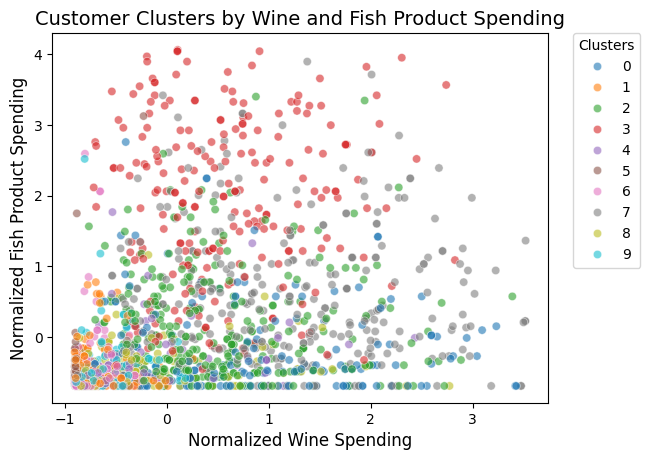

In [34]:
# visualizing 10 clusters defined by K means algorithm
kmeans_10 = KMeans(n_clusters = 10, random_state =0, n_init="auto")
kmeans_10.fit(marketing_df_normalized)
import seaborn as sns

# selecting 10 different colors
colors = sns.color_palette('tab10', n_colors=10)

# creating scatter plot
sns.scatterplot(data=marketing_df_normalized,
                x="MntWines",
                y="MntFishProducts",
                hue=kmeans_10.labels_,
                palette=colors,
                alpha=0.6)

# adding title and labels to the graph
plt.title('Customer Clusters by Wine and Fish Product Spending', fontsize=14)
plt.xlabel('Normalized Wine Spending', fontsize=12)
plt.ylabel('Normalized Fish Product Spending', fontsize=12)

# moving legend outside of plot for clarity
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title='Clusters')

plt.show()

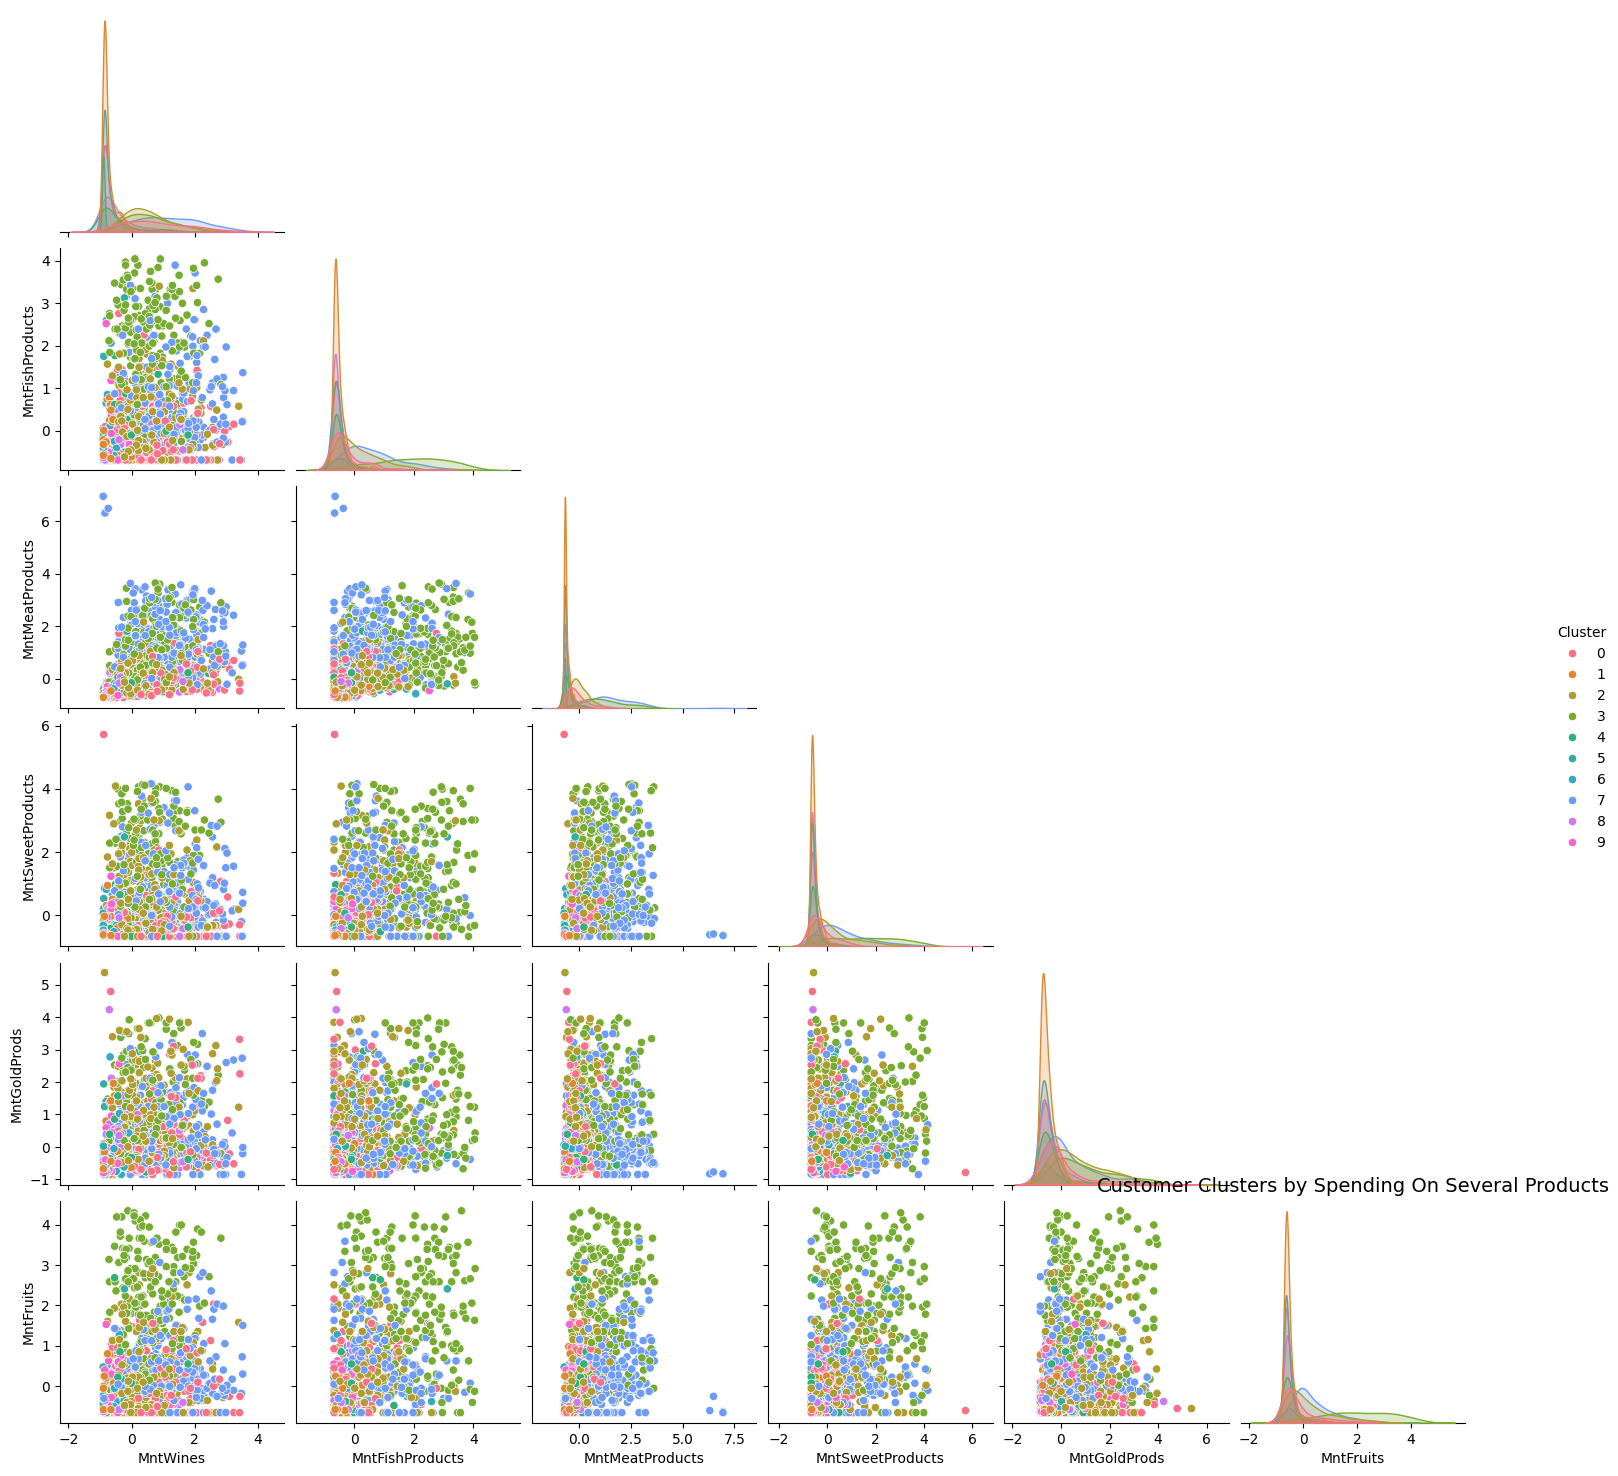

In [32]:
marketing_df_with_clusters = marketing_df_normalized.copy()
marketing_df_with_clusters['Cluster'] = kmeans_10.labels_

# Create a color palette for 10 clusters
colors = sns.color_palette('husl', n_colors=10)  # or 'tab10', 'Set3', etc.

# variables to plot
selected_vars = ['MntWines', 'MntFishProducts', 'MntMeatProducts', 'MntSweetProducts', 'MntGoldProds', "MntFruits", "Cluster"]
# Create the pairplot
sns.pairplot(marketing_df_with_clusters[selected_vars],
             hue='Cluster',
             palette=colors,
             corner = True)

# adding title and labels to the graph
plt.title('Customer Clusters by Spending On Several Products', fontsize=14)

plt.show()

# Models

* Feature selection (like k-fold, etc.)
* Balancing and standardization
* Our three models

In [ ]:
# Balancing the data


# Results